In [2]:
import numpy as np
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as plt
import cv2

In [3]:
DATA_PATH = r'C:/Users/soodn/Downloads/Naveksha/Kaggle HuBMAP/'
# Read rle prediction table (submission.csv) as df
df = pd.read_csv('submission-wgo-kaggle.csv')
# Read ground truth rles as rles
rles = pd.read_csv(DATA_PATH + 'Data/kidney-data/test.csv')
df_info = pd.read_csv(DATA_PATH + 'Data/kidney-data/HuBMAP-20-dataset_information.csv')

In [4]:
def enc2mask(encs, shape):
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for m, enc in enumerate(encs):
        if isinstance(enc, np.float) and np.isnan(enc):
            continue
        enc_split = enc.split()
        for i in range(len(enc_split) // 2):
            start = int(enc_split[2 * i]) - 1
            length = int(enc_split[2 * i + 1])
            img[start: start + length] = 1 + m

    return img.reshape(shape).T

In [5]:
threshold = 0.5

<ipython-input-4-de0336860c98>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(enc, np.float) and np.isnan(enc):


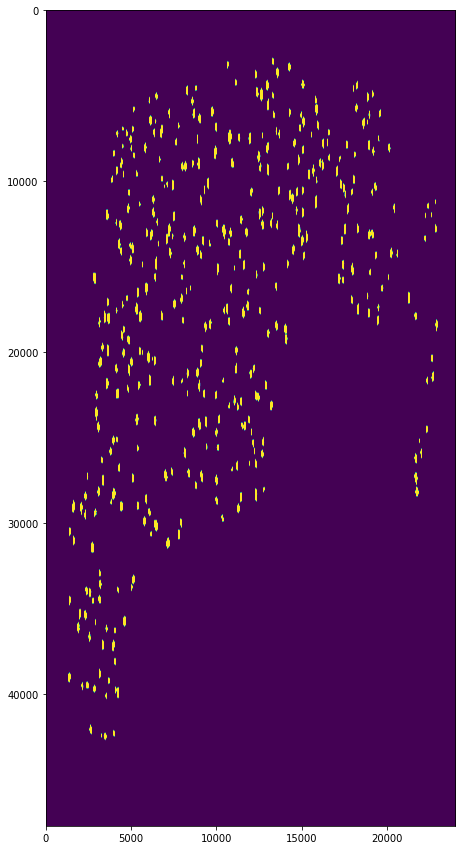

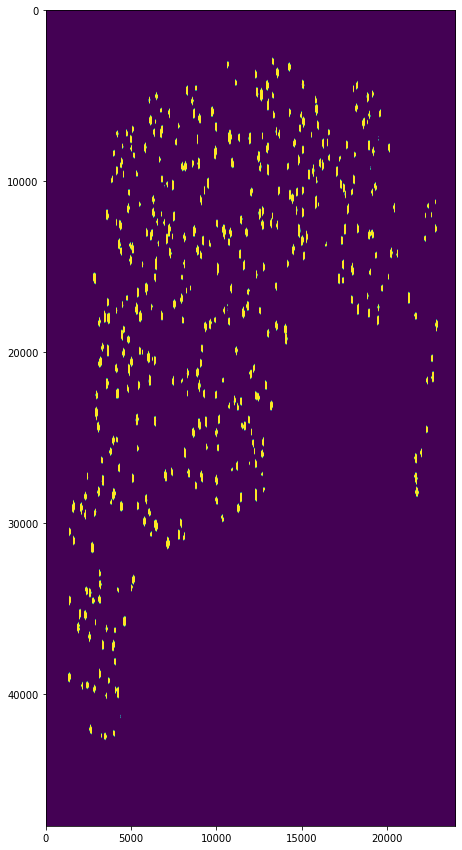

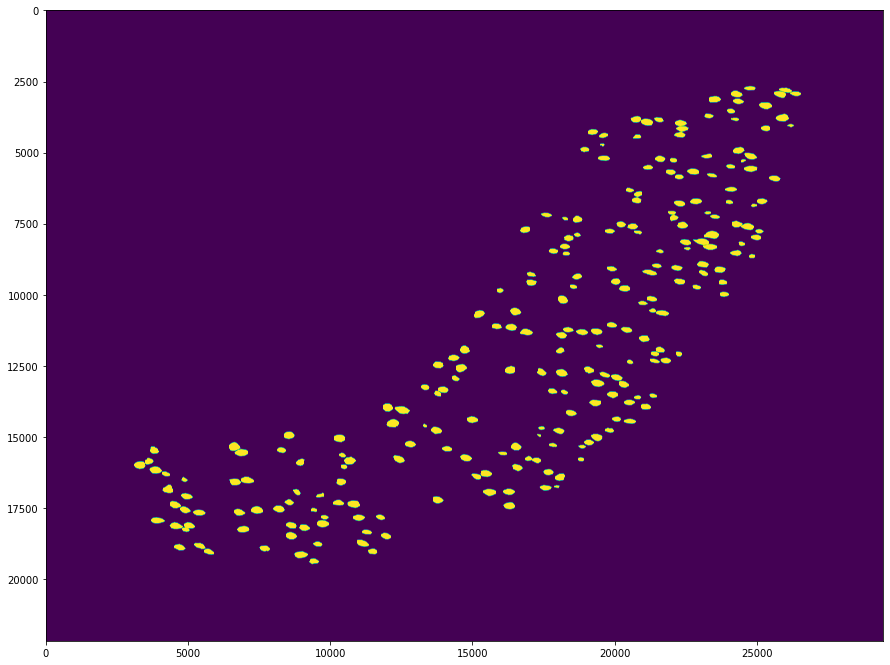

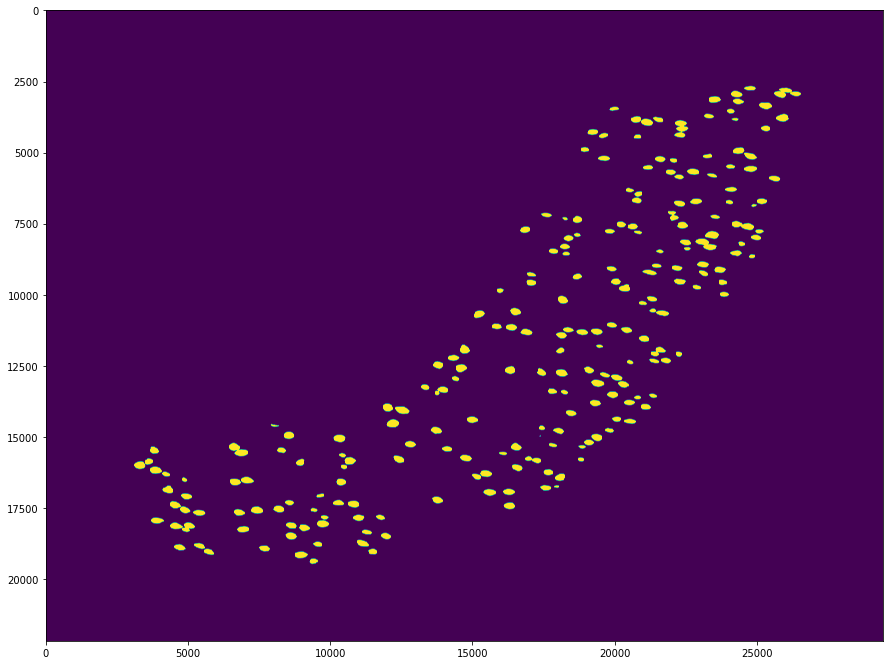

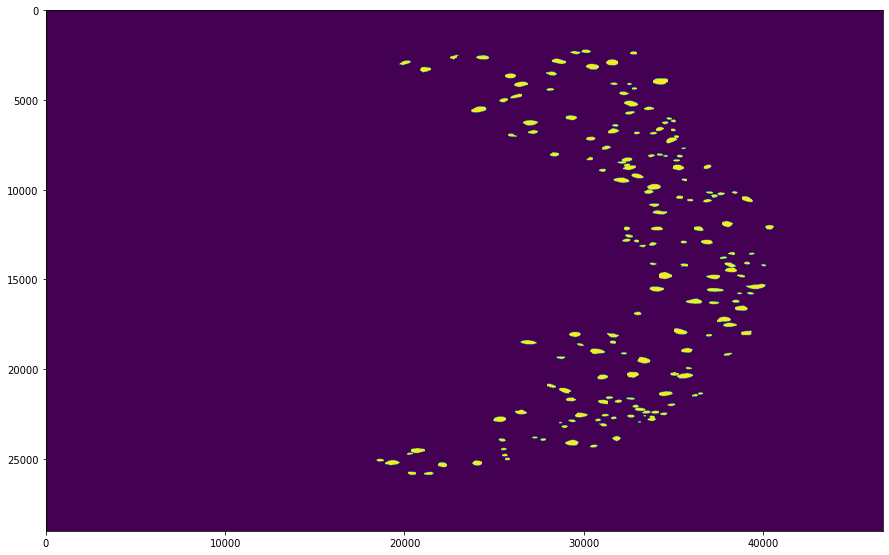

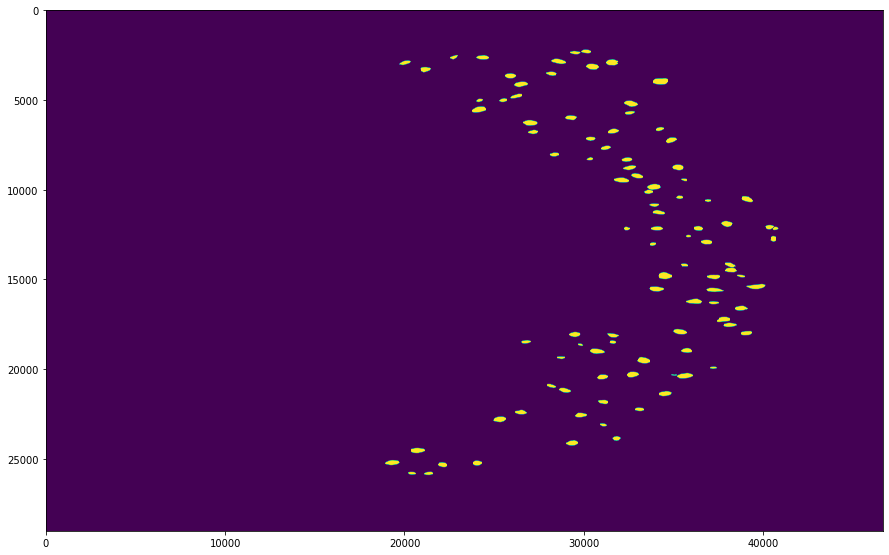

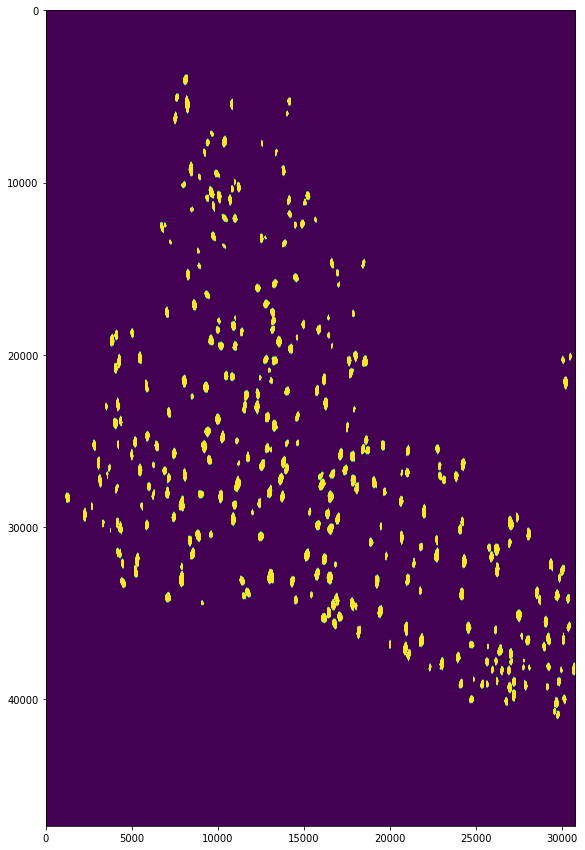

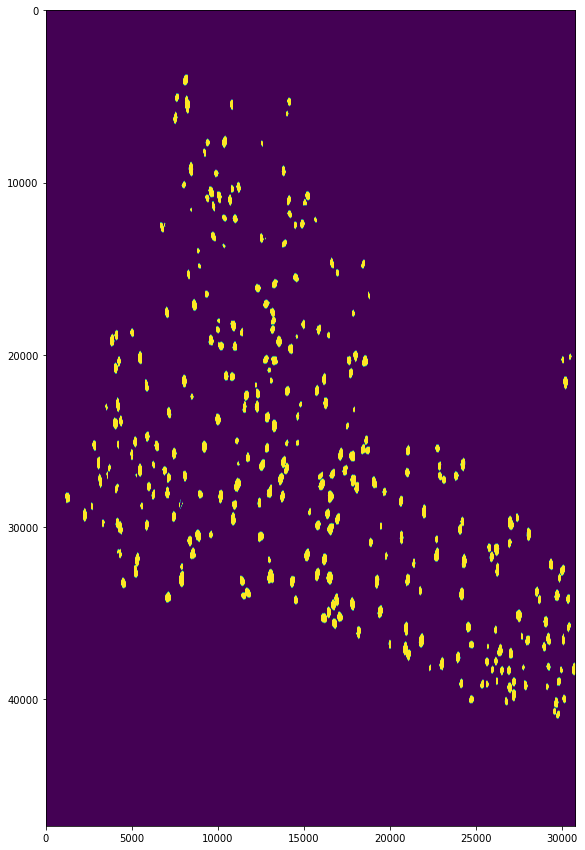

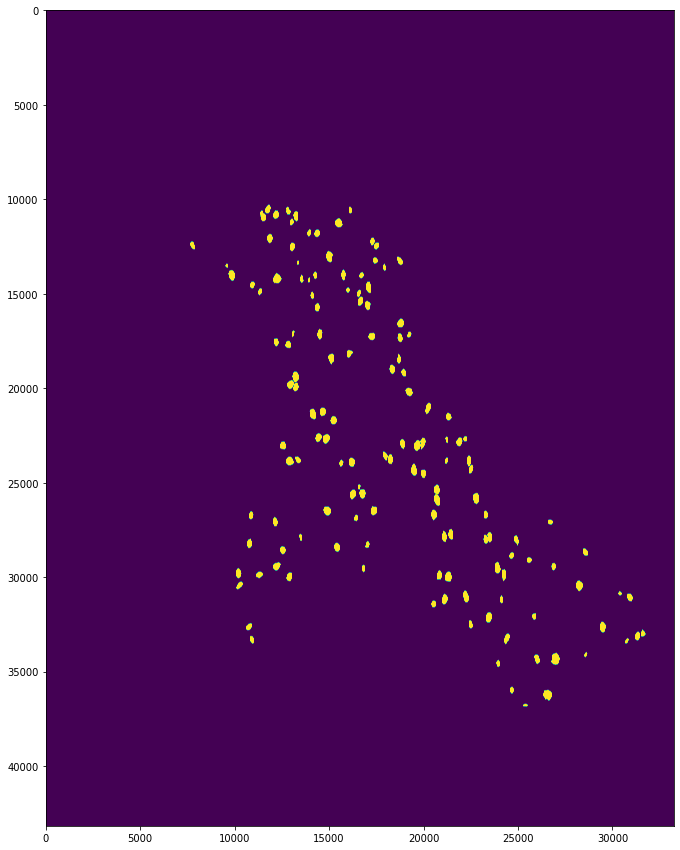

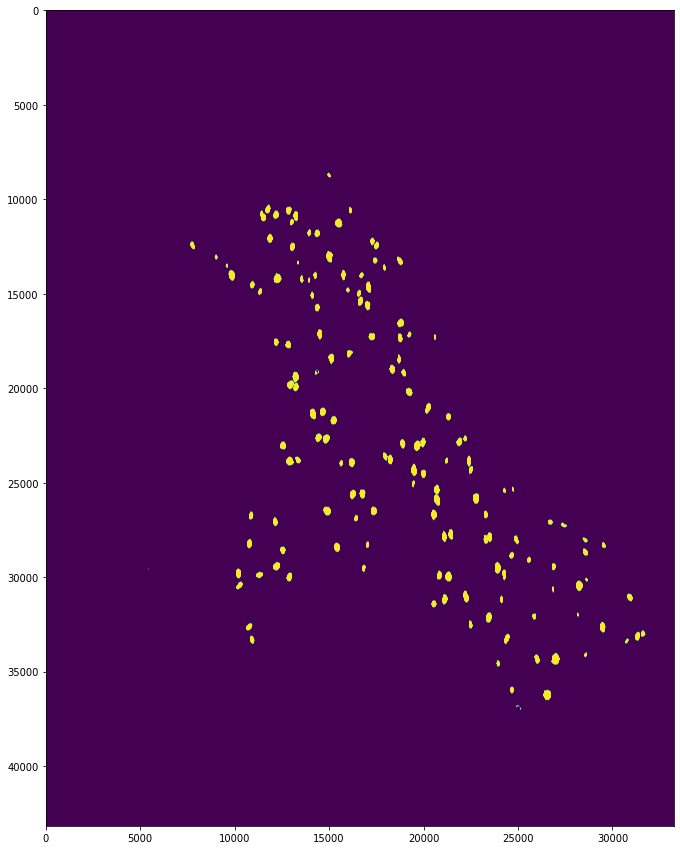

In [10]:
for img in rles['id'].unique():
    shape = df_info[df_info.image_file == img + ".tiff"][['width_pixels', 'height_pixels']].values.astype(int)[0]
    
    truth = rles[rles['id'] == img]['encoding']
    mask_truth = enc2mask(truth, shape)
    
    gt_mask = cv2.resize((mask_truth*255).astype('uint8'), (shape[1], shape[0]))
    gt_mask = (gt_mask>threshold*255).astype(np.uint8)
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(gt_mask)
    plt.savefig("gt"+img+".png")
    
    pred = df[df['id'] == img]['predicted']
    mask_pred = enc2mask(pred, shape) 
    
    pred_mask = cv2.resize((mask_pred*255).astype('uint8'), (shape[1], shape[0]))
    pred_mask = (pred_mask>threshold*255).astype(np.uint8)
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(pred_mask)
    plt.savefig("pred"+img+".png")